In [165]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import plotly.express as px

In [72]:
diabetes_data = pd.read_csv('diabetes2.csv')
#random 1000 data are selected
#diabetes_data = diabetes_data.sample(n=1000)

In [73]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Pregnancies
Number of pregnancies the individual has had.

Glucose
Plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test.

BloodPressure
Diastolic blood pressure (mm Hg).

SkinThickness
Thickness of skinfold (mm) at the triceps.

Insulin
2-Hour serum insulin (mu U/ml).

BMI
2-Hour serum insulin (mu U/ml).

DiabetesPedigreeFunction
Diabetes pedigree function, which represents the likelihood of diabetes based on family history.

Age
Age of the individual (years).

Outcome
Binary label indicating whether the individual has diabetes (1) or not (0).

In [78]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [80]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


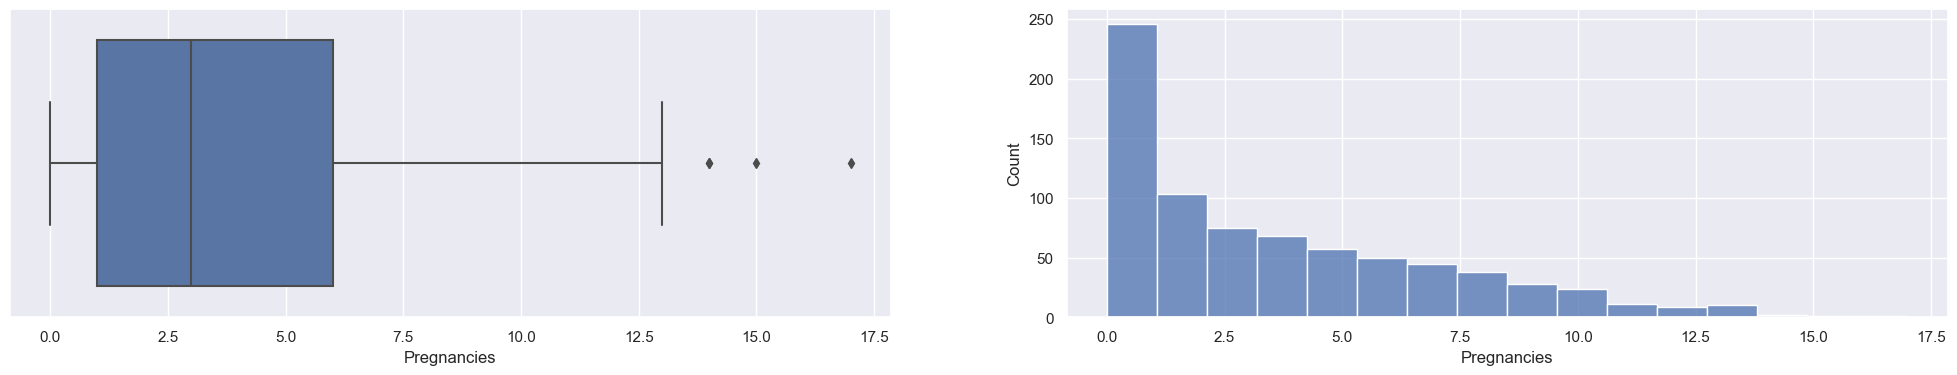

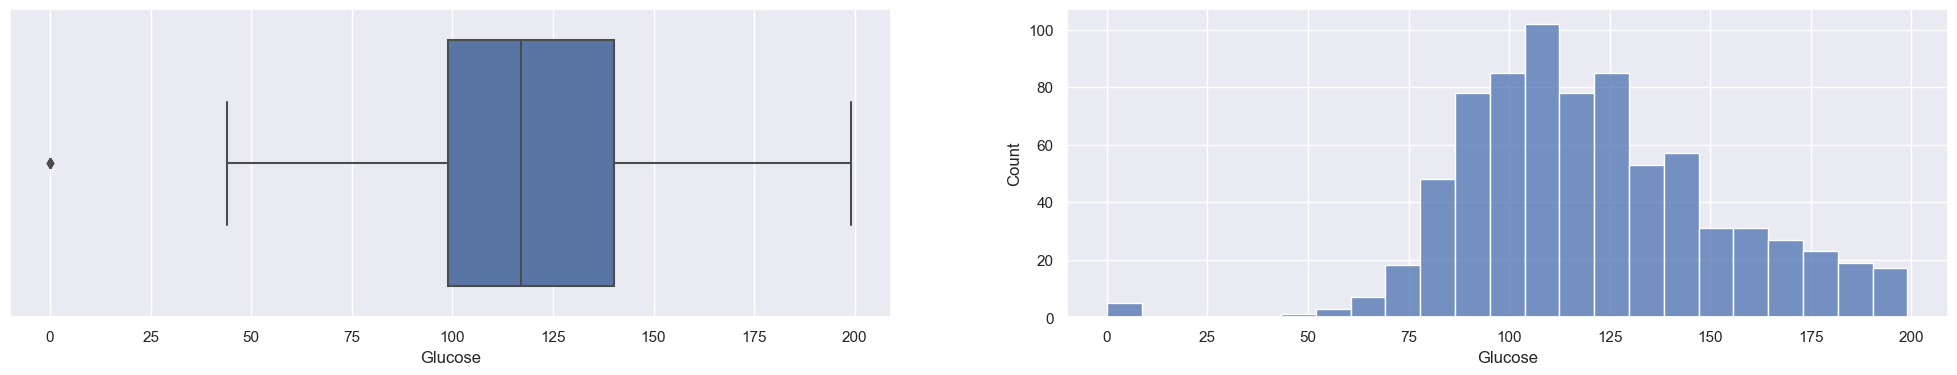

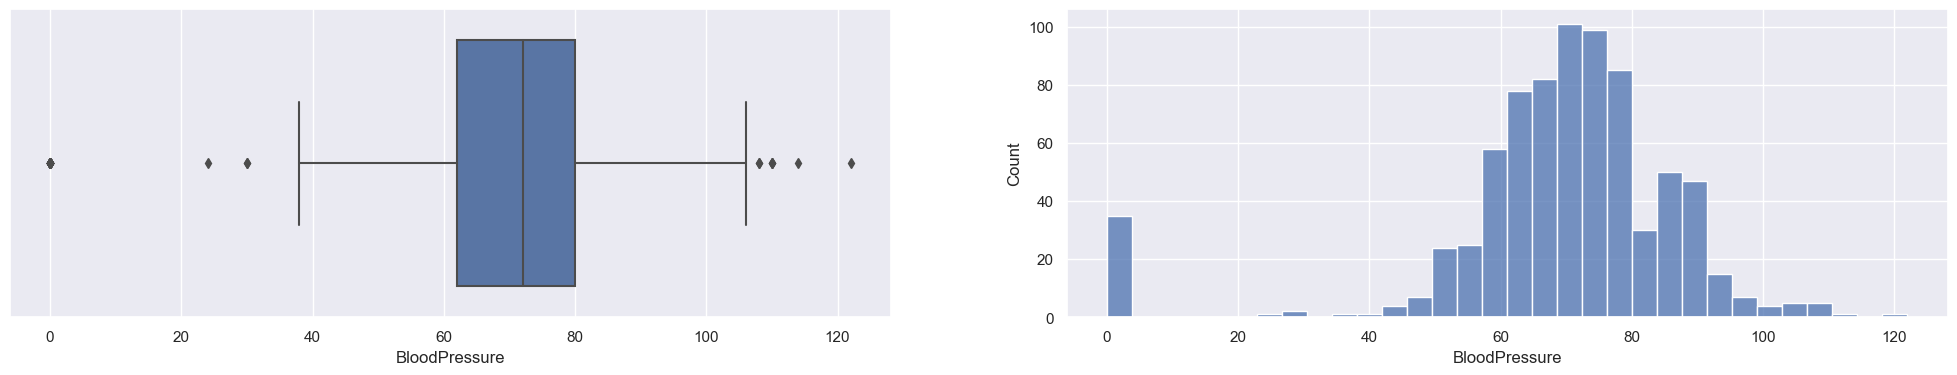

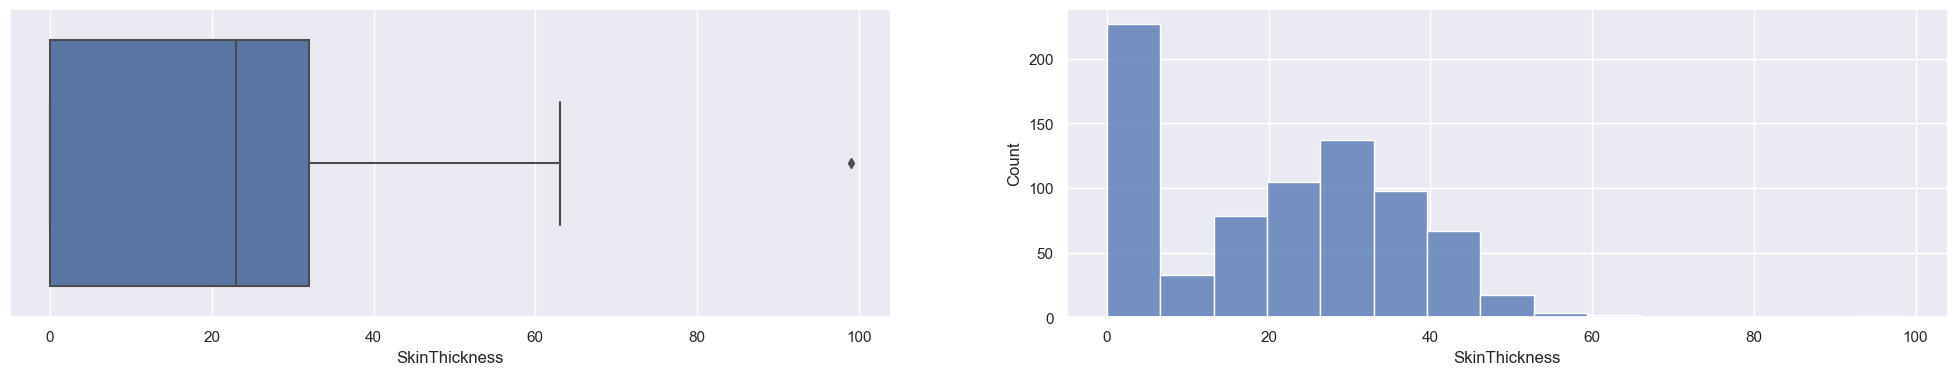

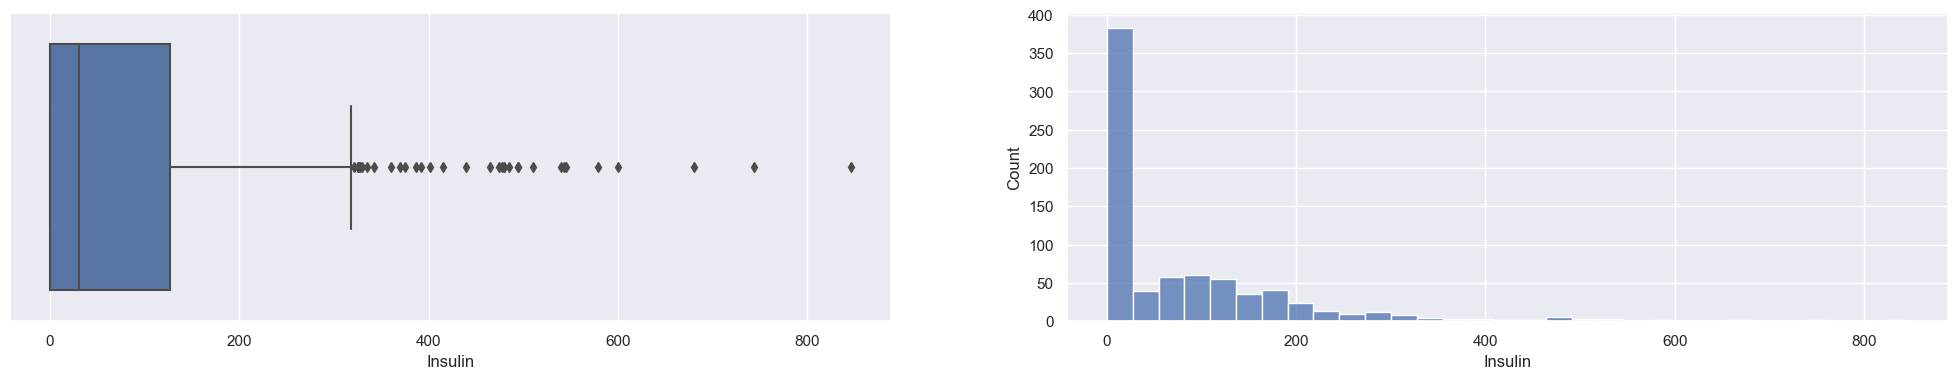

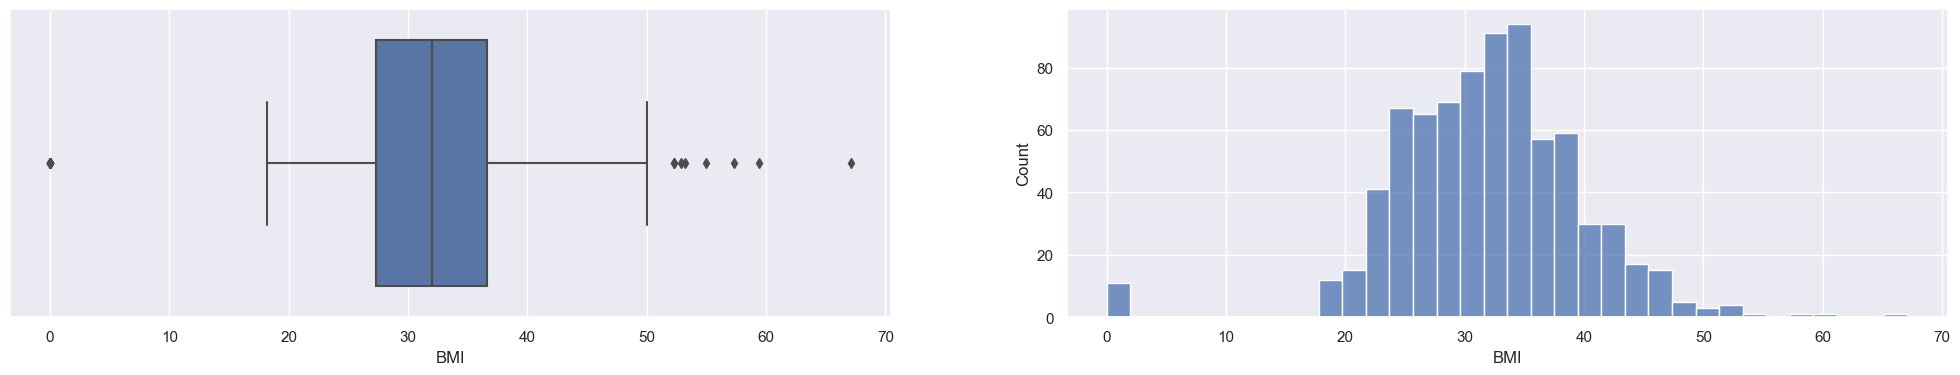

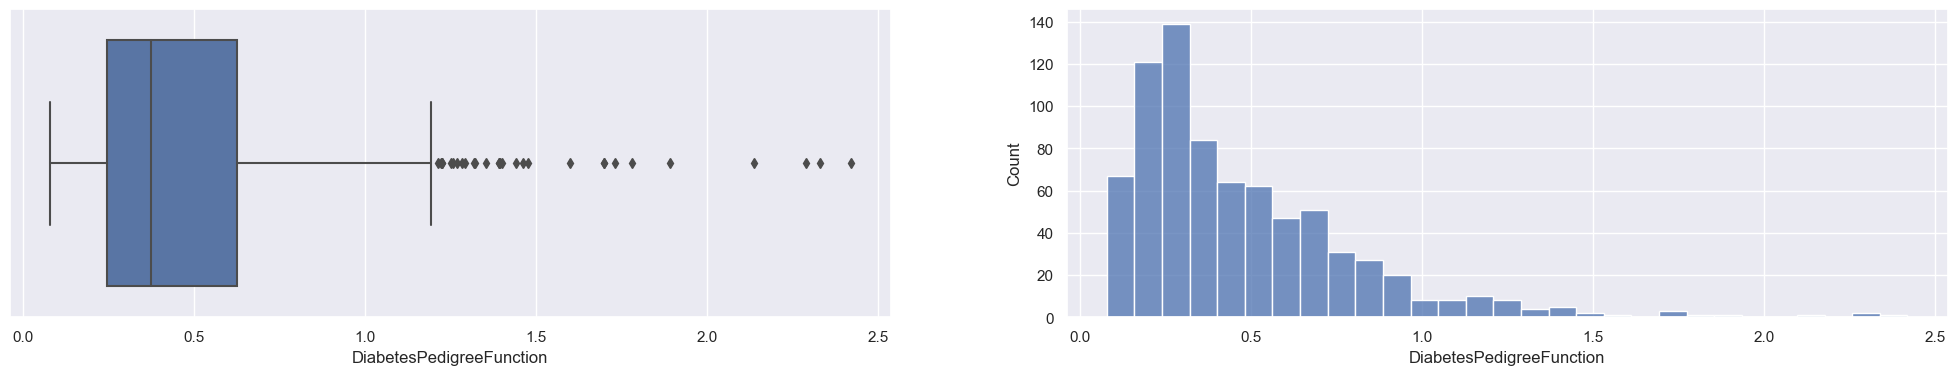

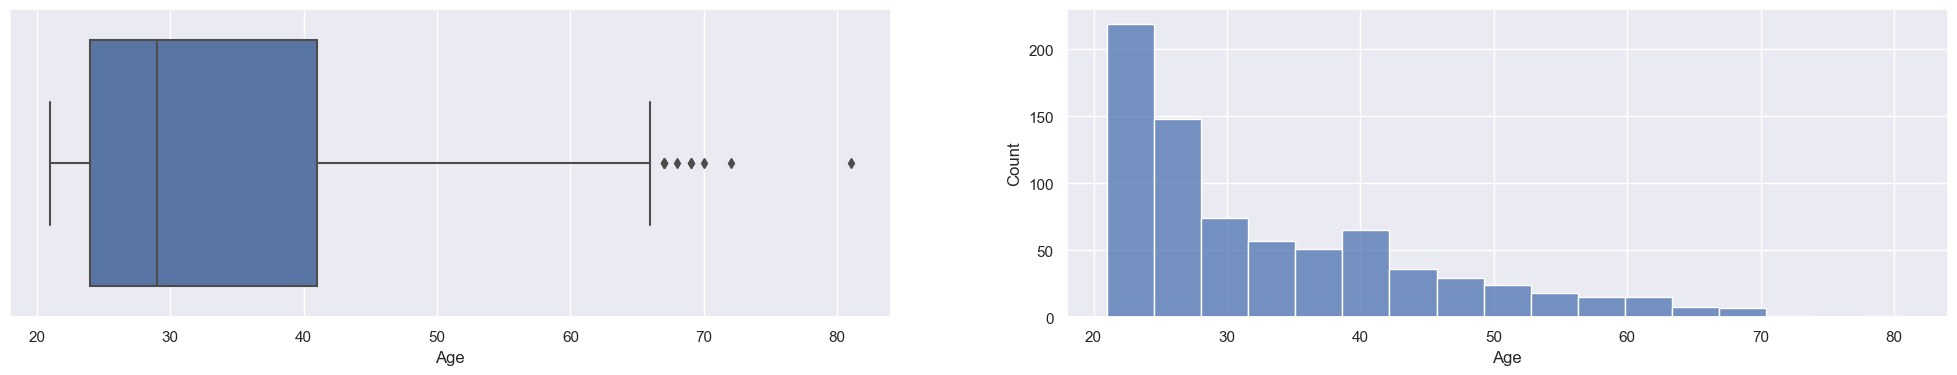

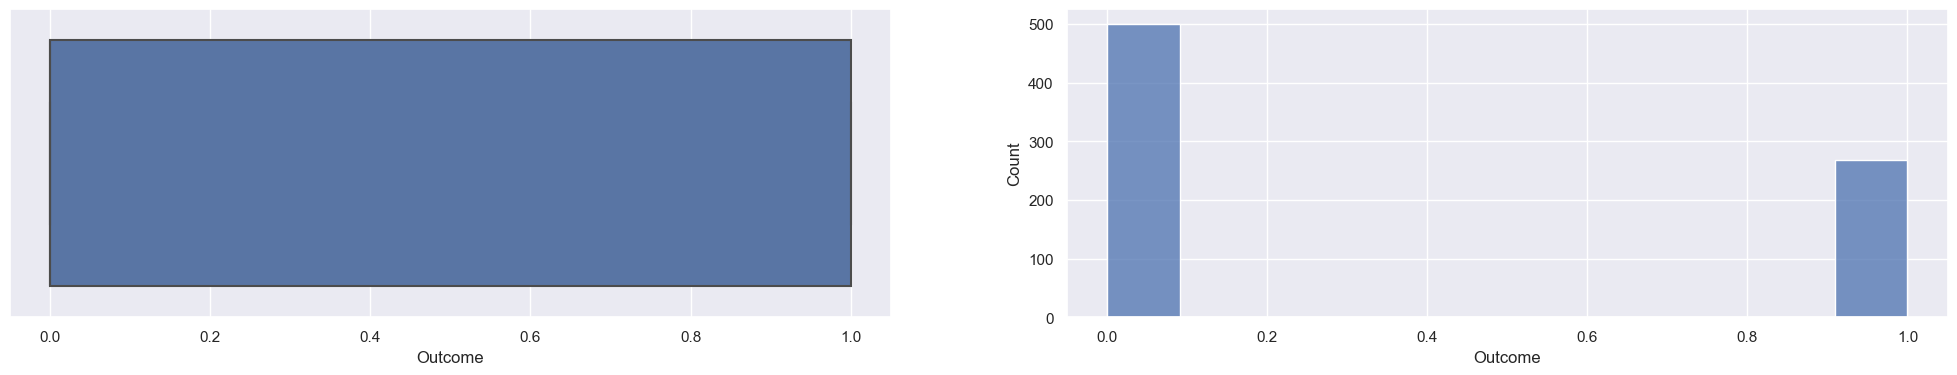

In [168]:
def Univariate_boxplot (data,column):
    f, axes = plt.subplots(1, 2, figsize=(25, 4))
    sb.boxplot(x = column,data = data, orient = "h", ax = axes[0])
    sb.histplot(data = data,x = column, ax = axes[1])
for columns in diabetes_data :
    Univariate_boxplot (diabetes_data,columns)

### Correlation

<Axes: >

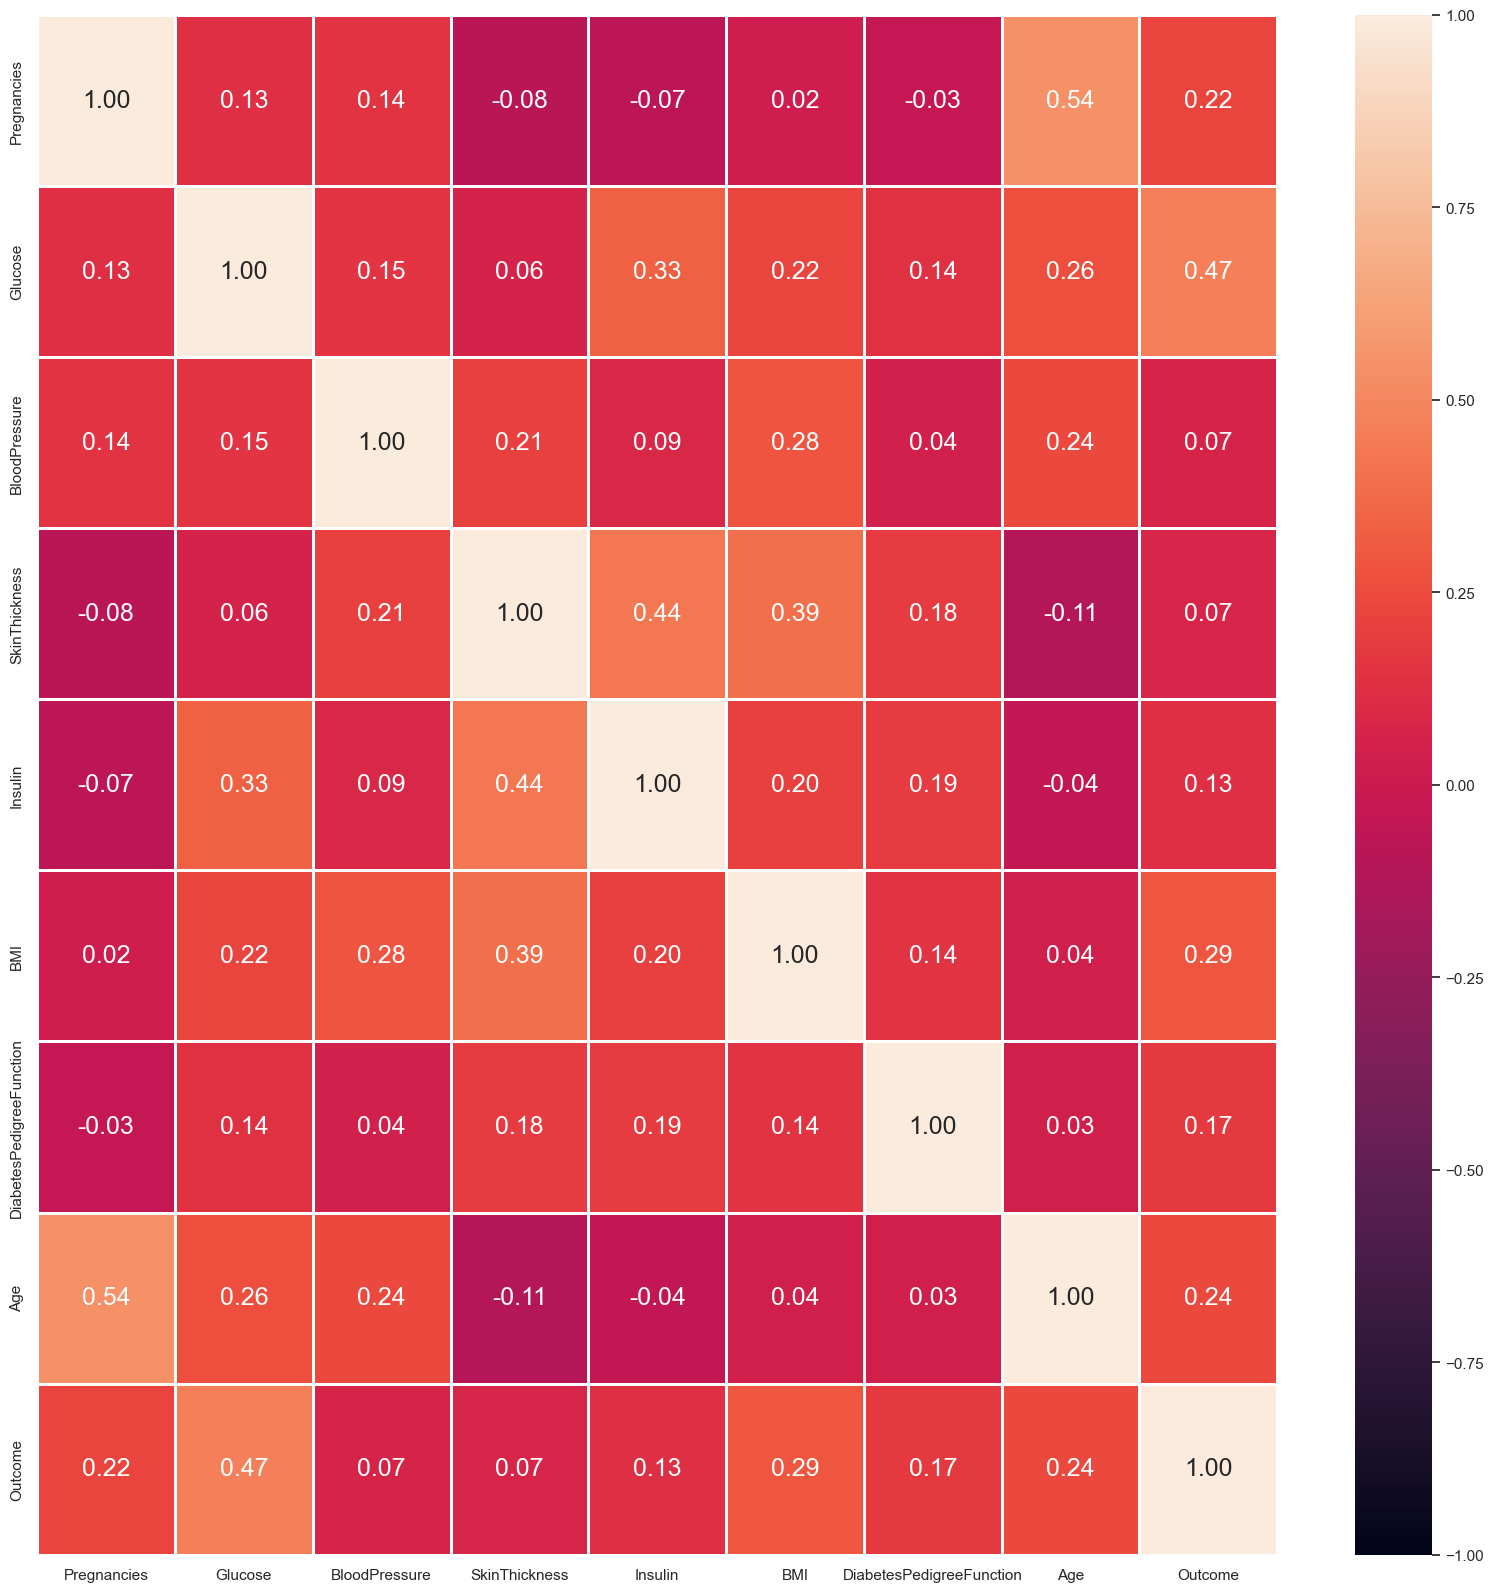

In [121]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(diabetes_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18})

In [79]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [82]:
#Relationship of variables

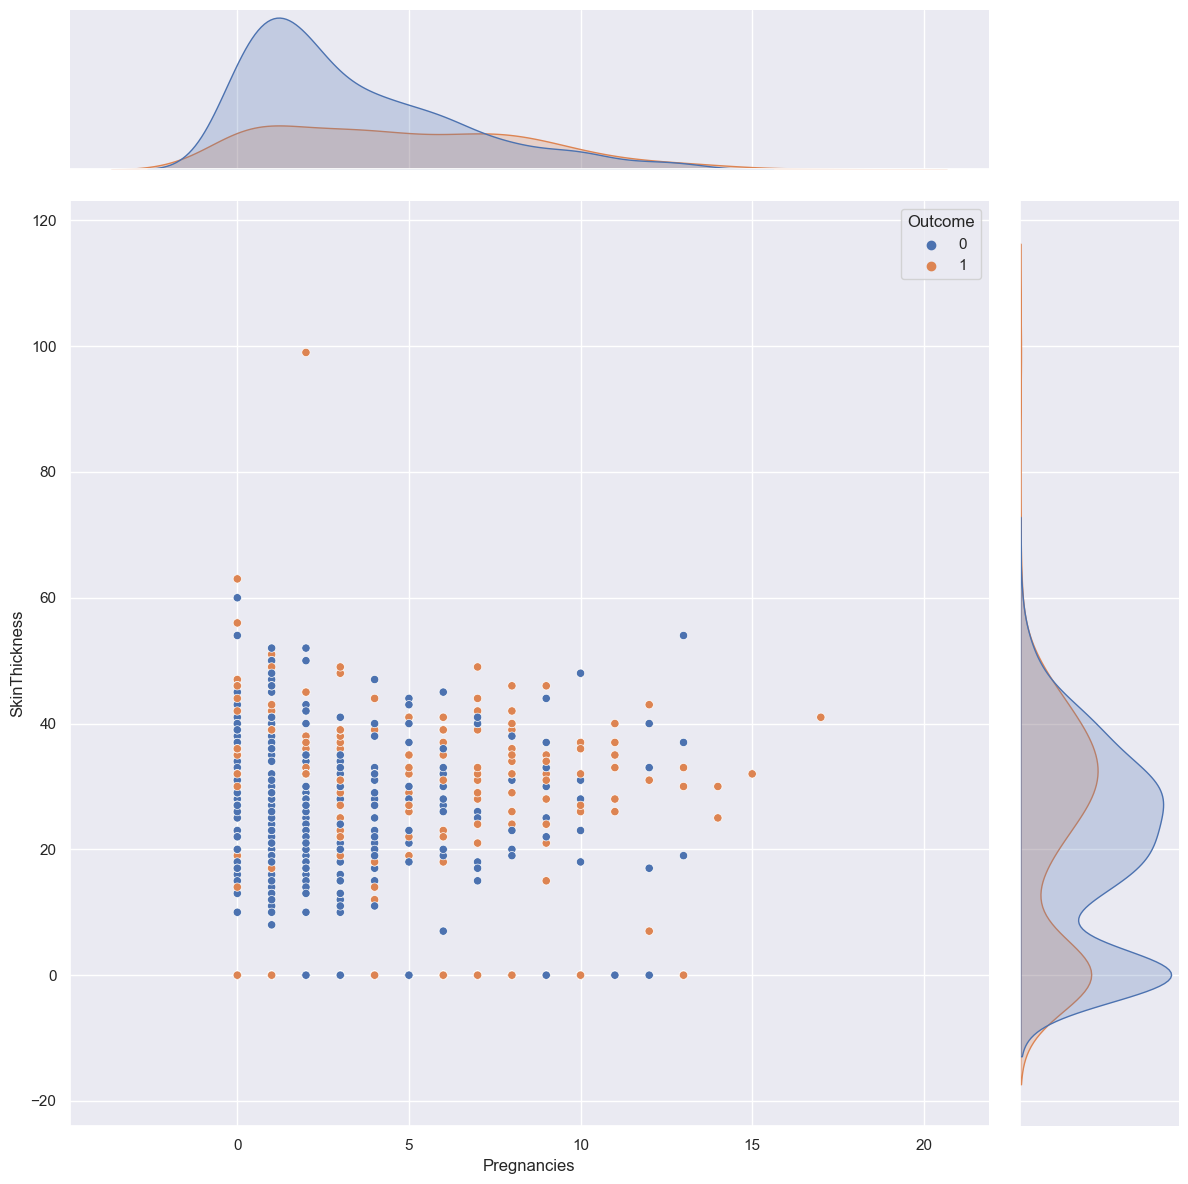

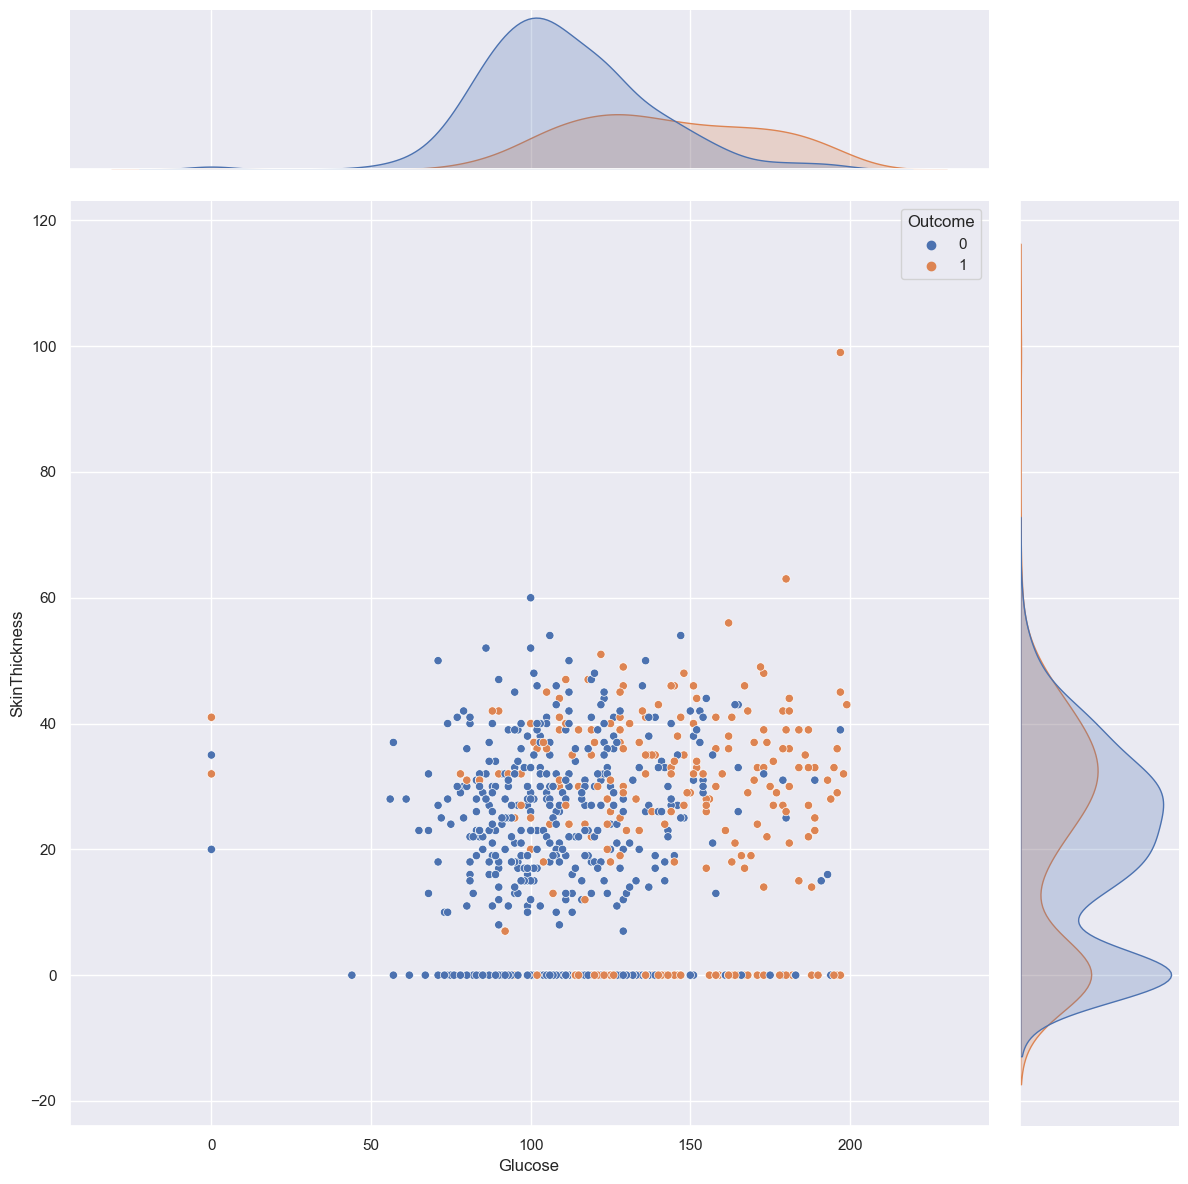

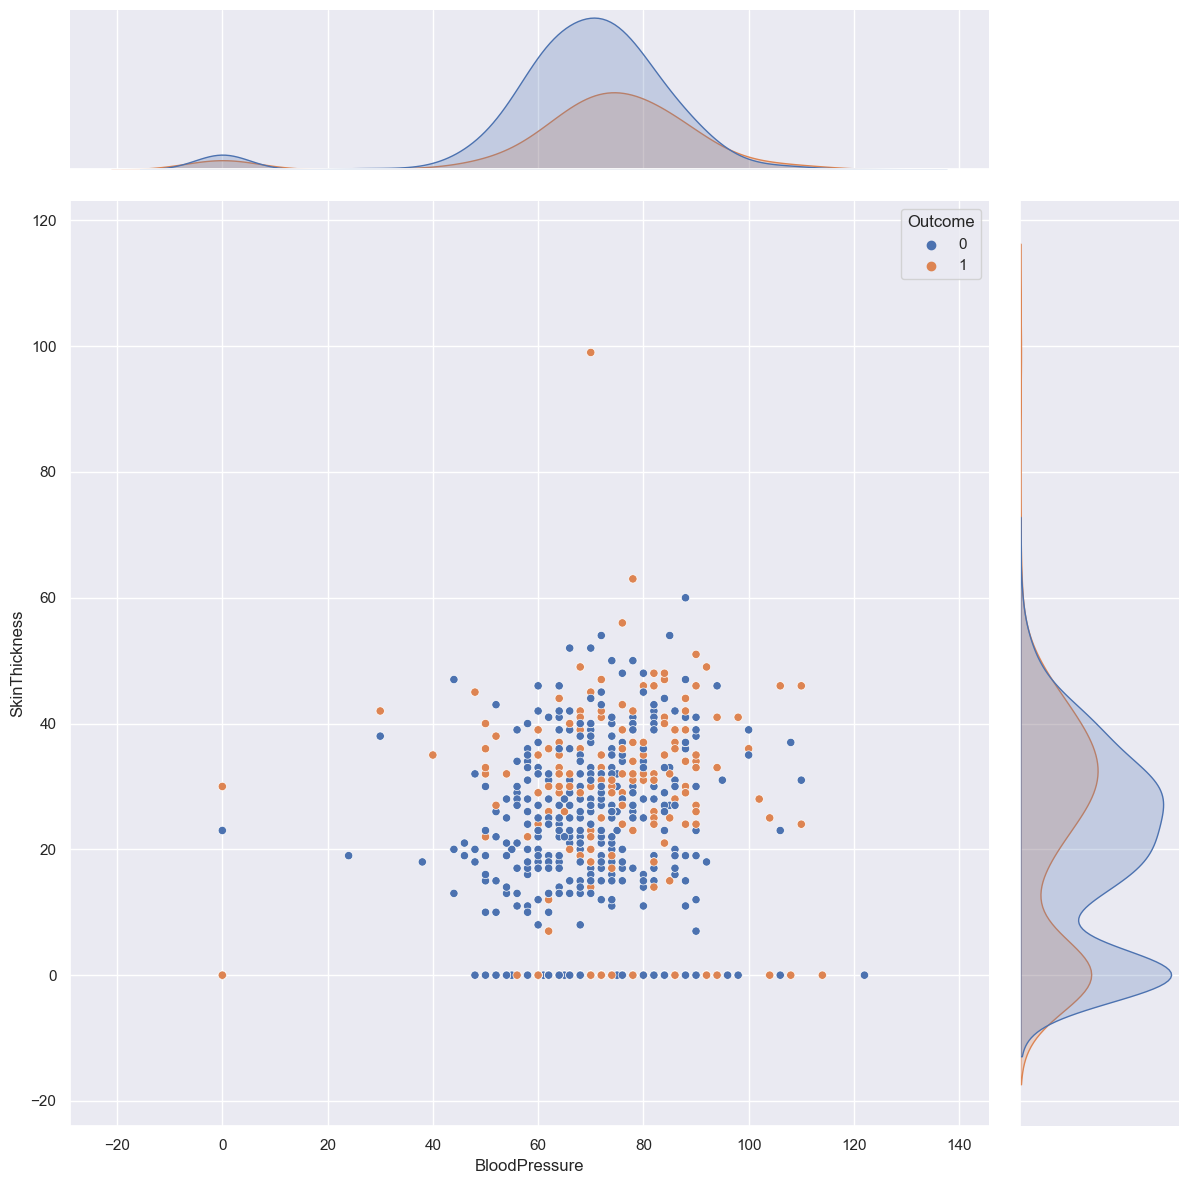

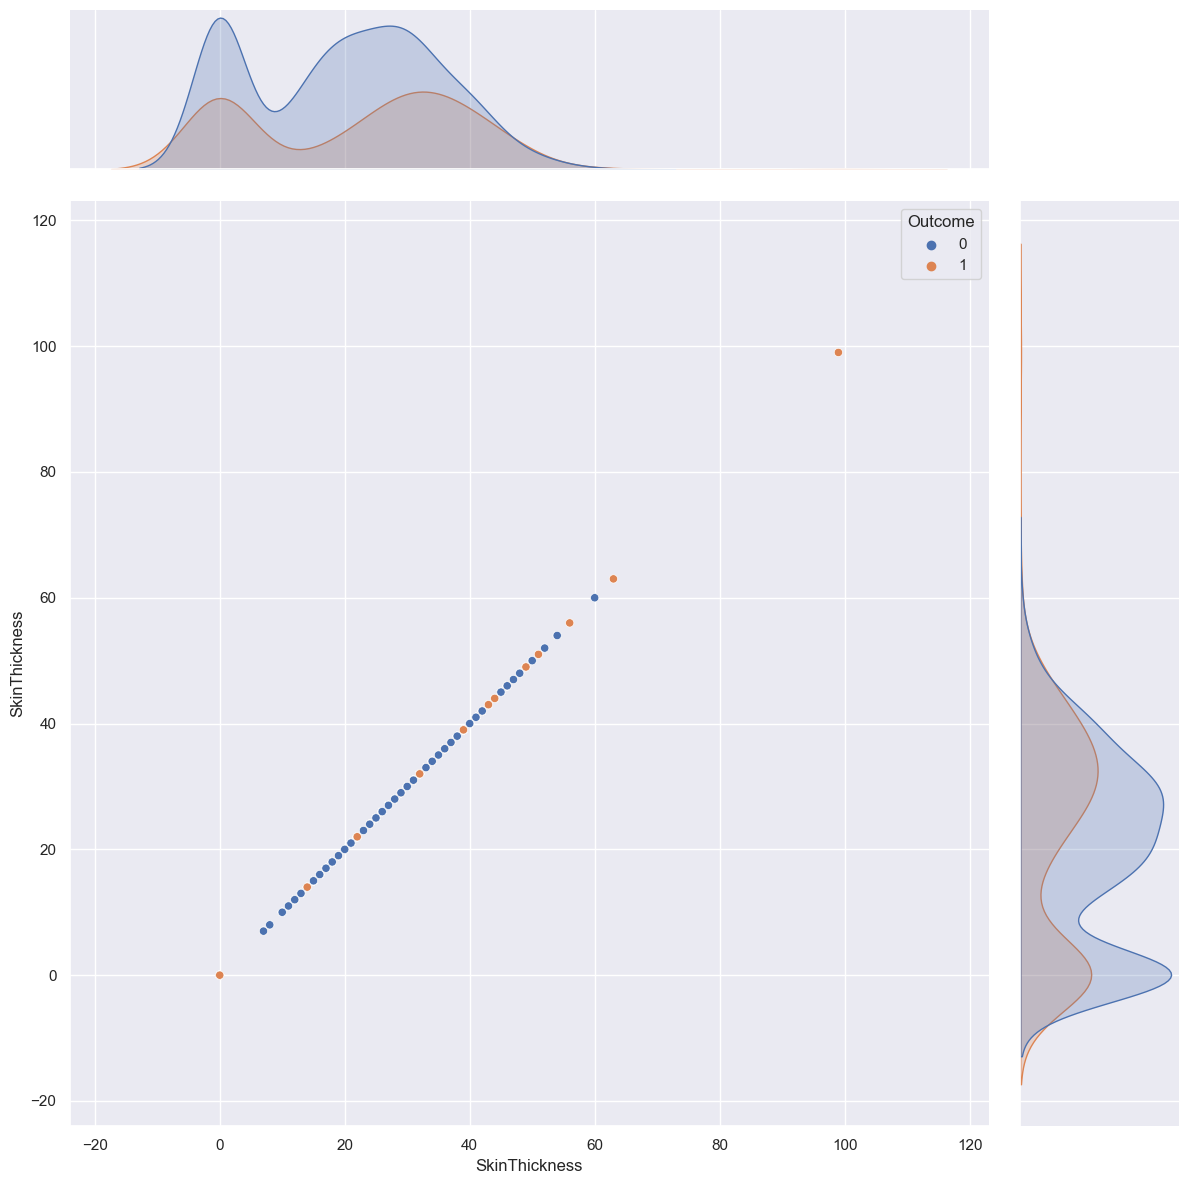

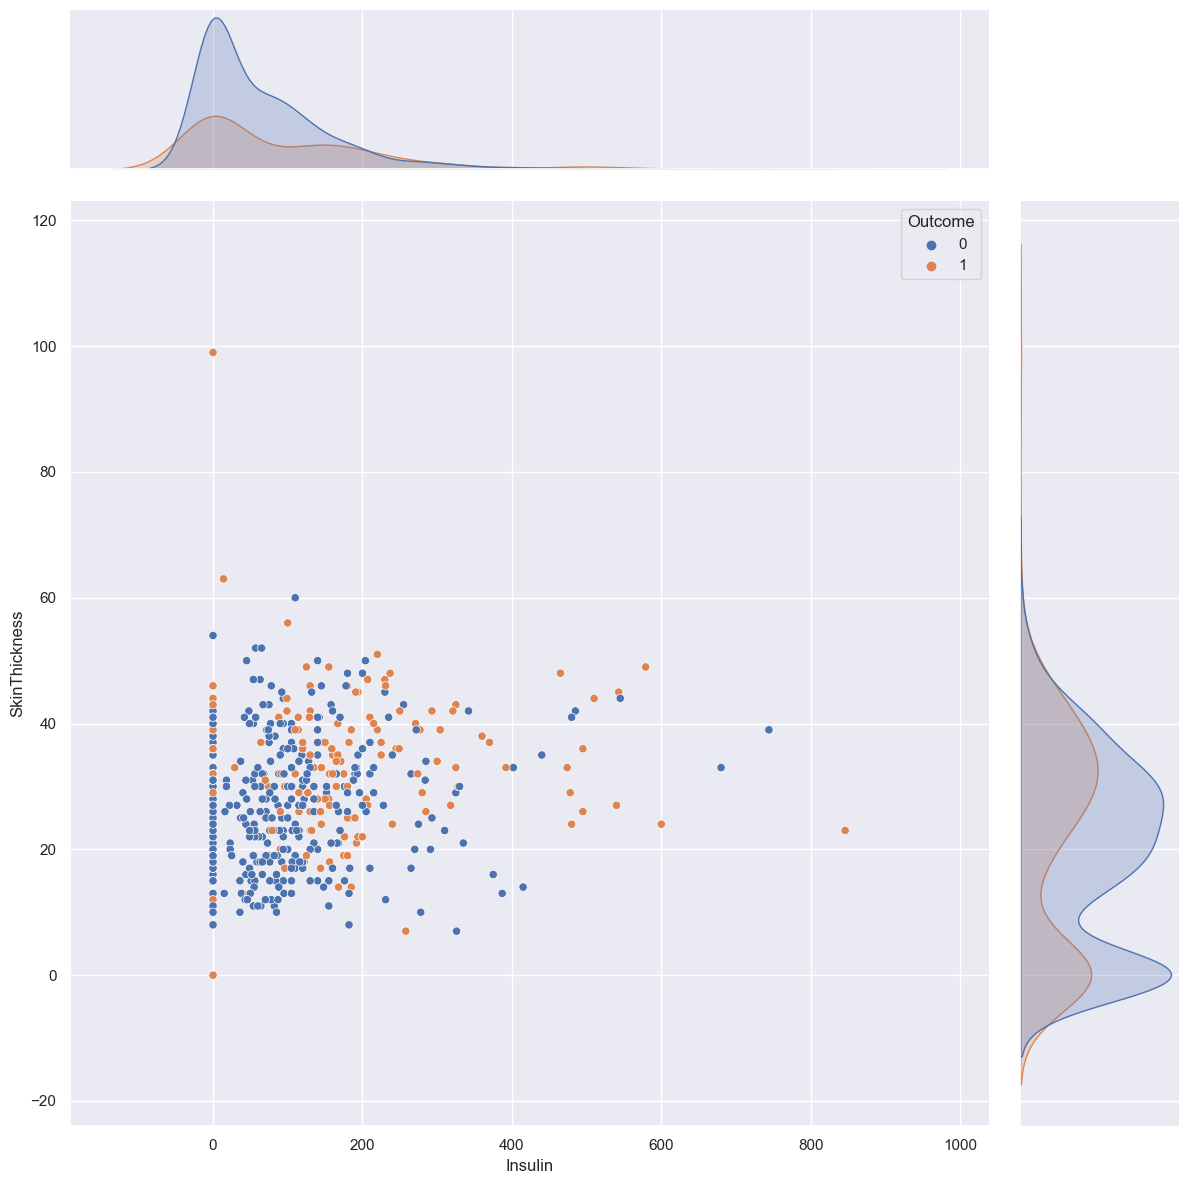

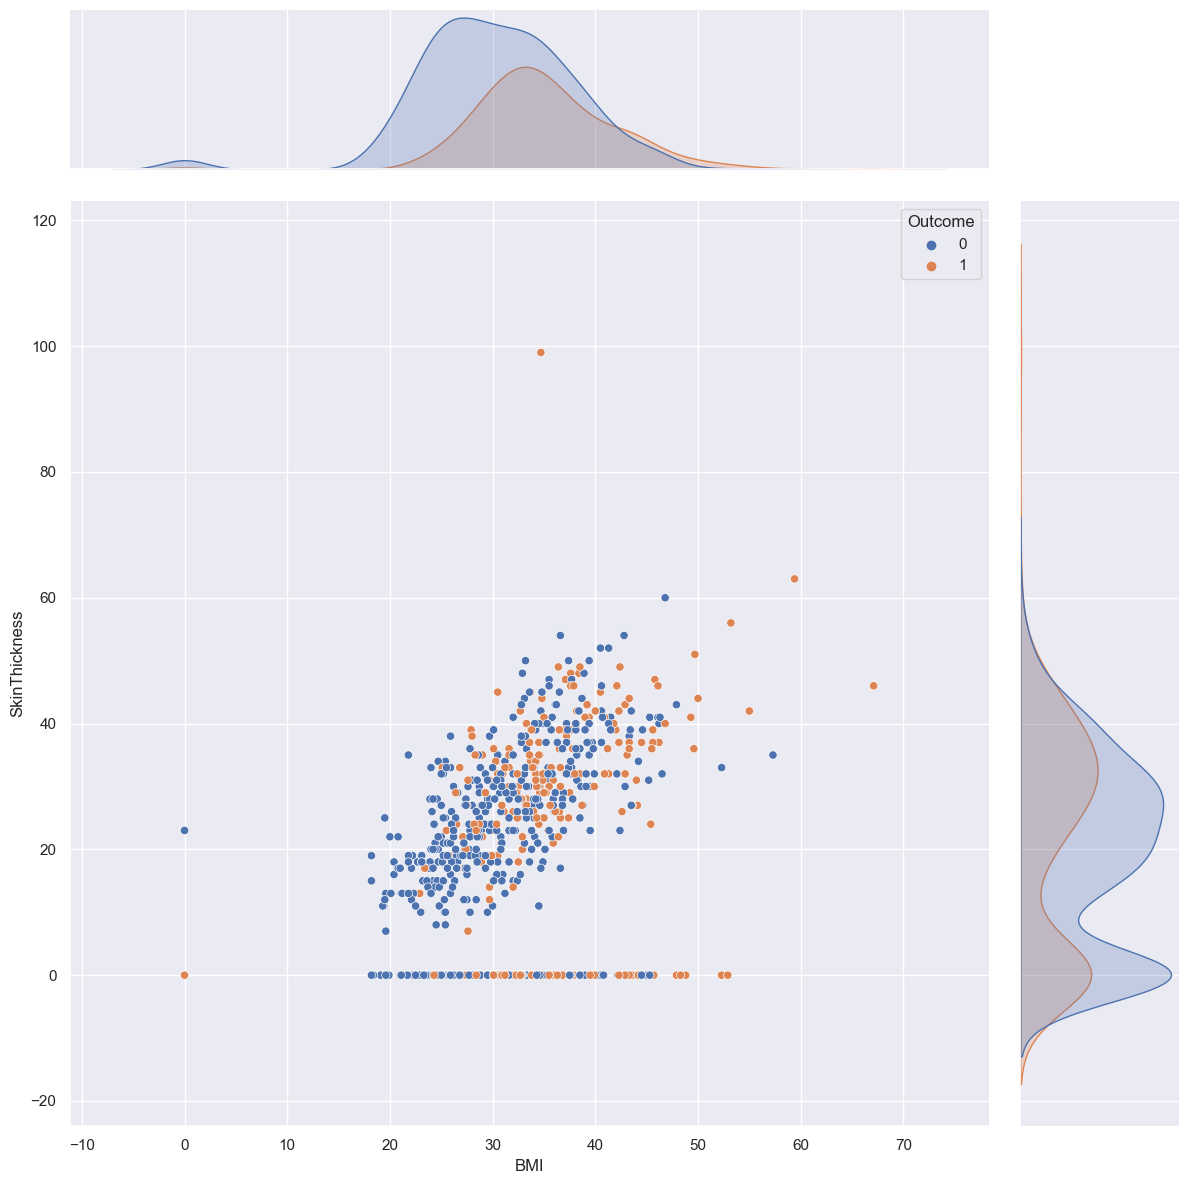

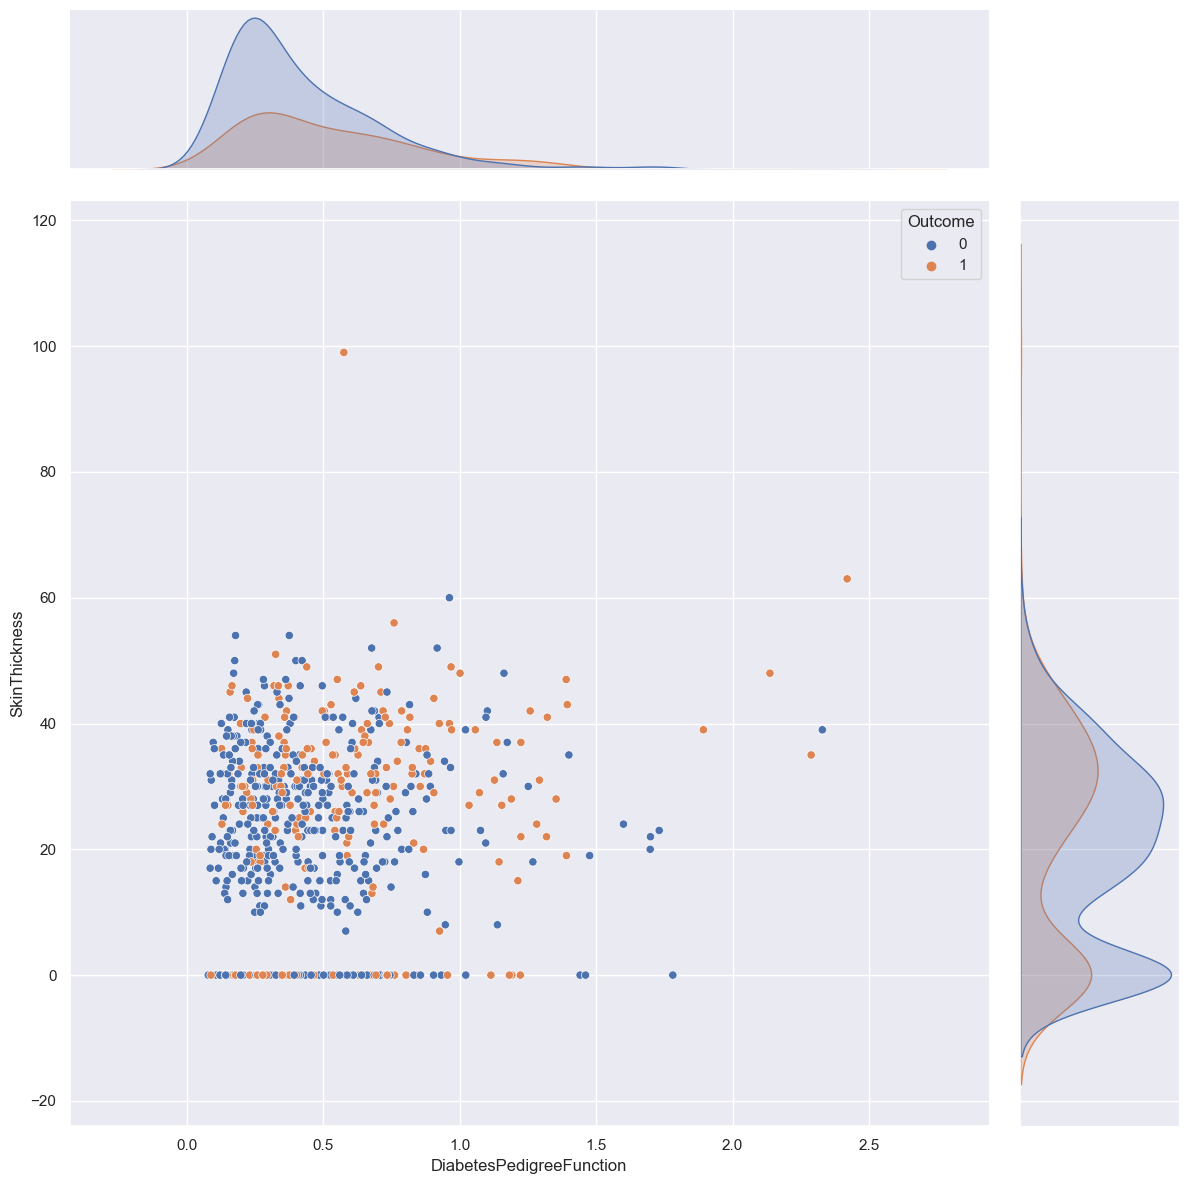

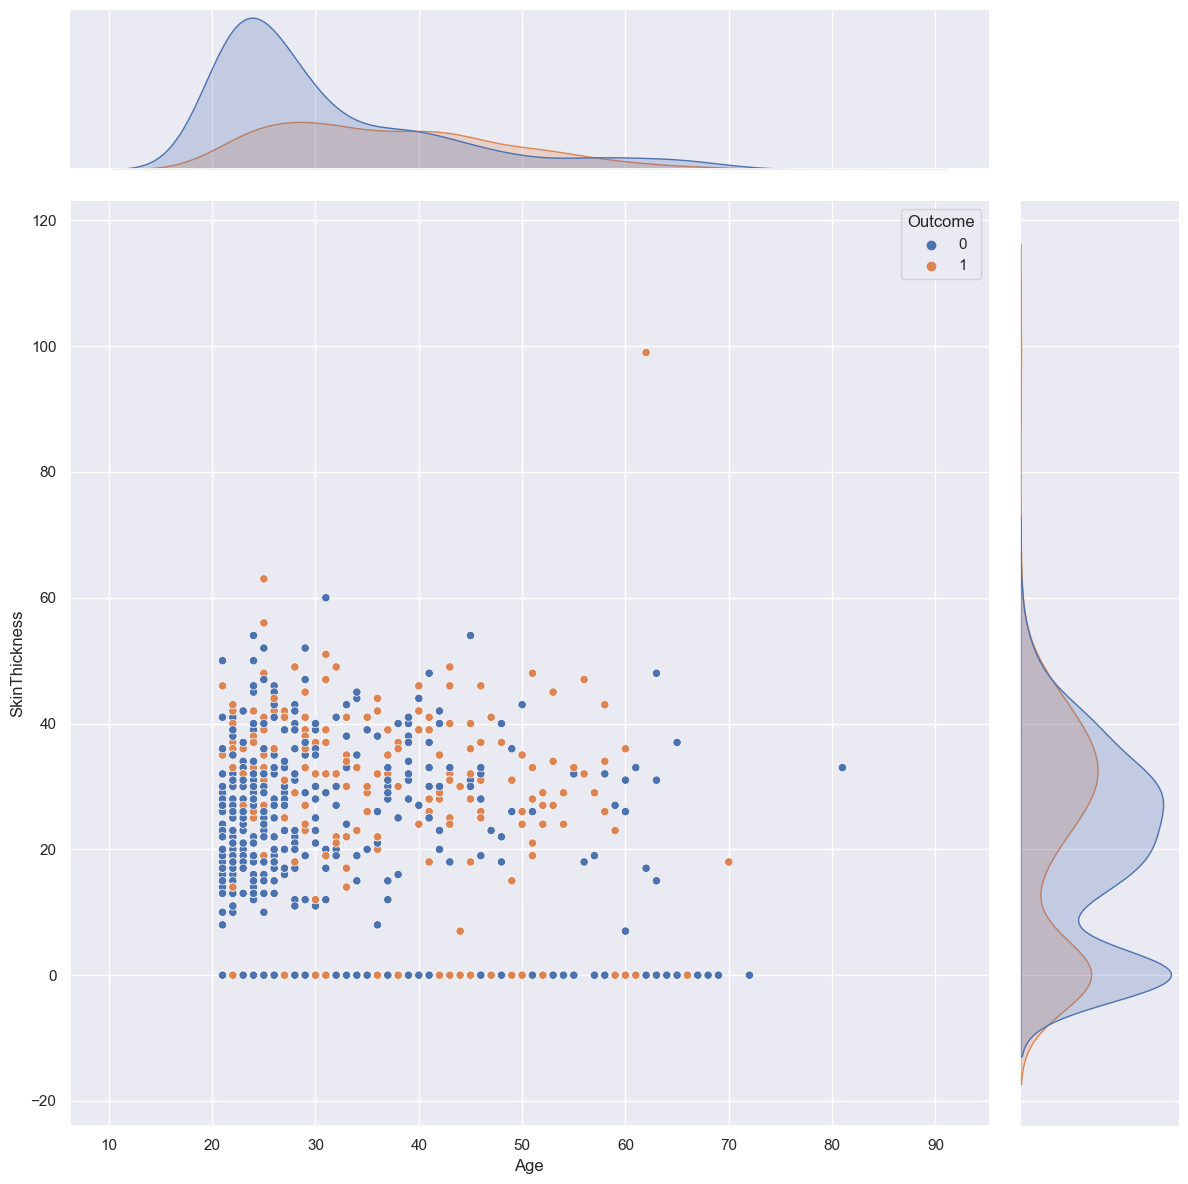

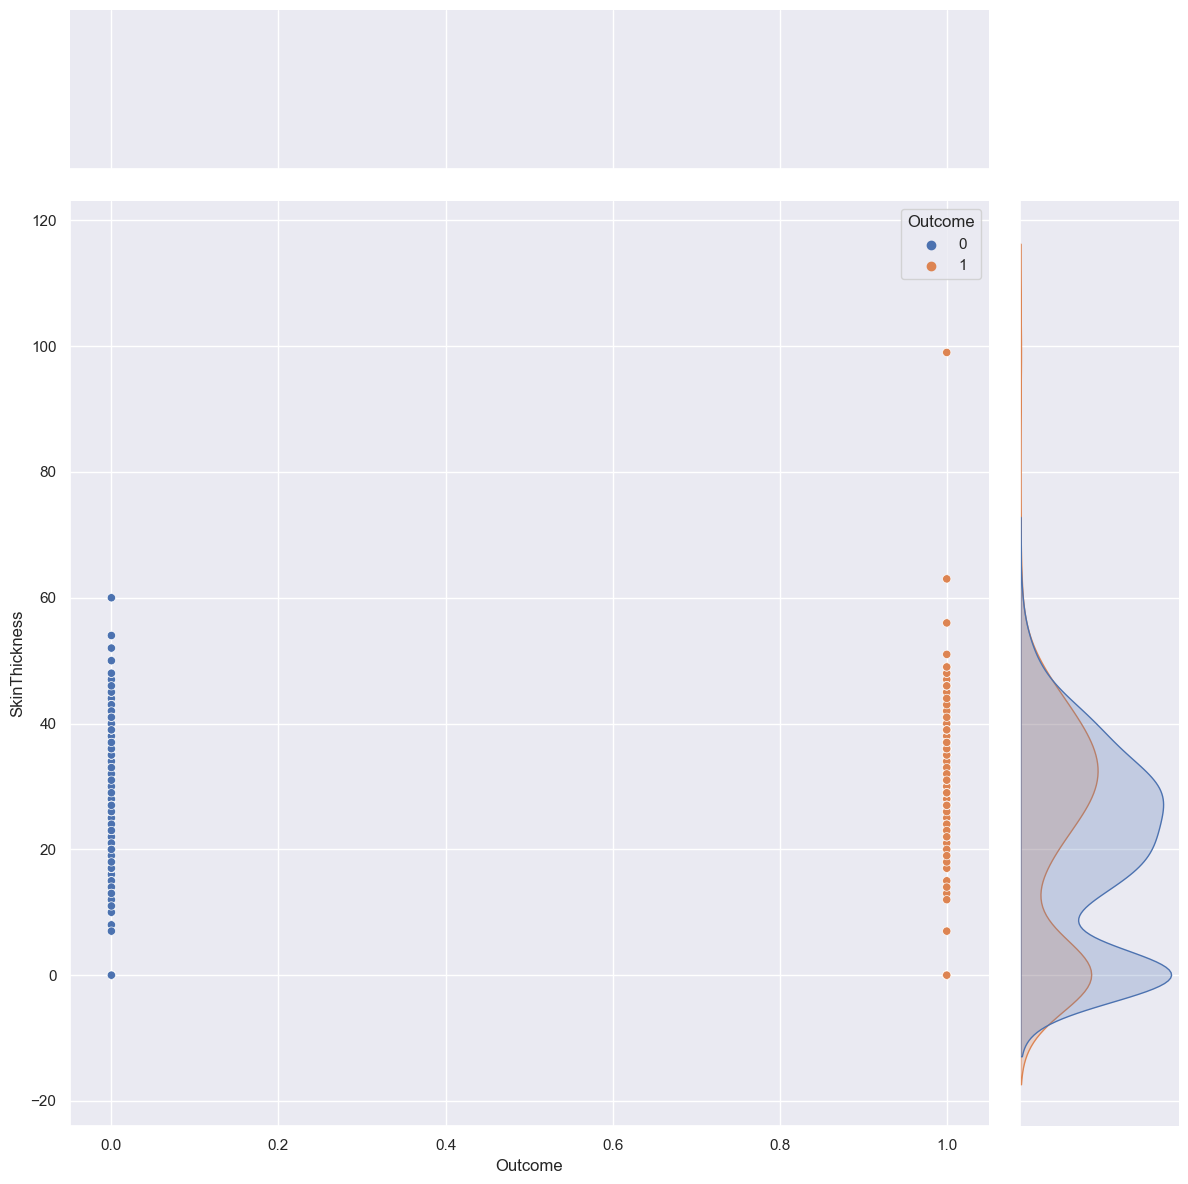

In [94]:
for columns in diabetes_data :
    sb.jointplot(data = diabetes_data, x = columns, y = 'SkinThickness', hue = 'Outcome', height = 12)


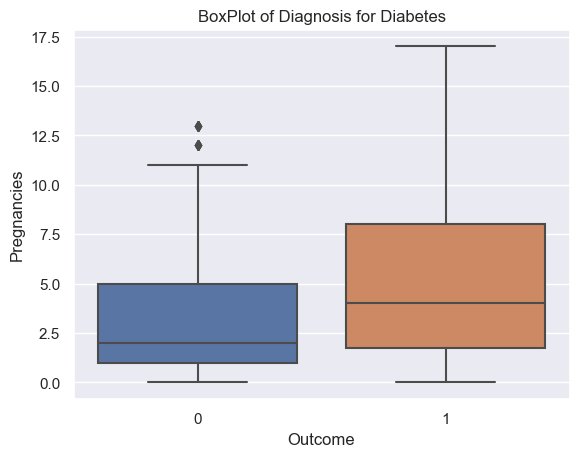

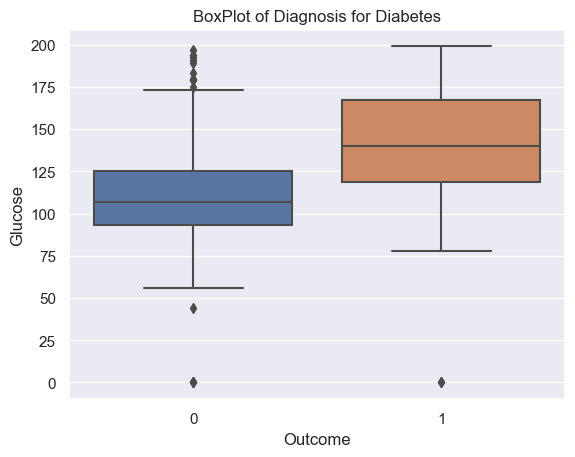

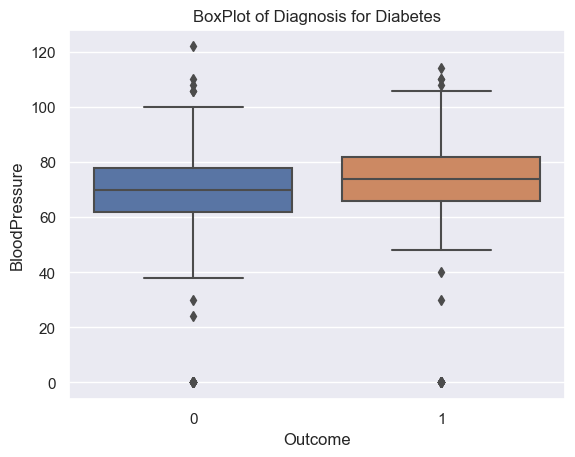

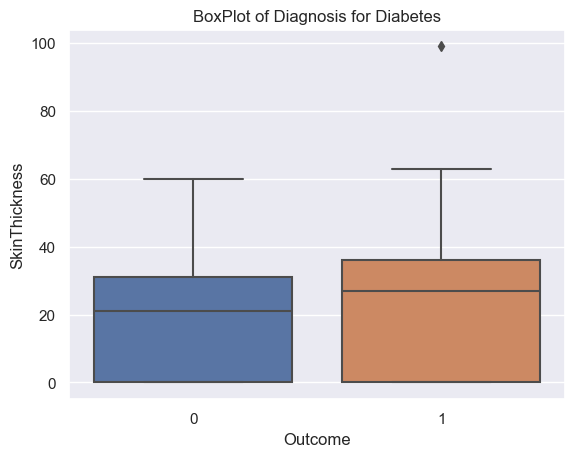

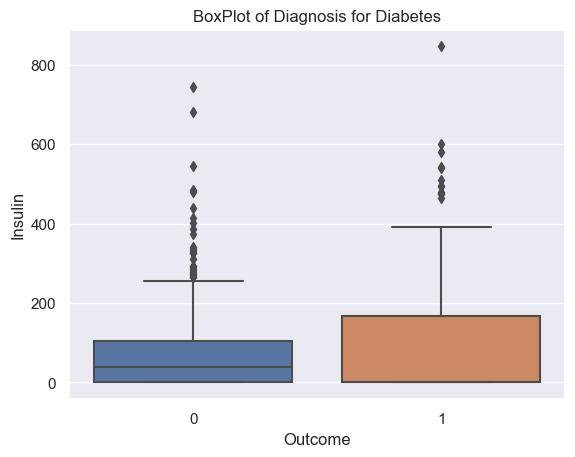

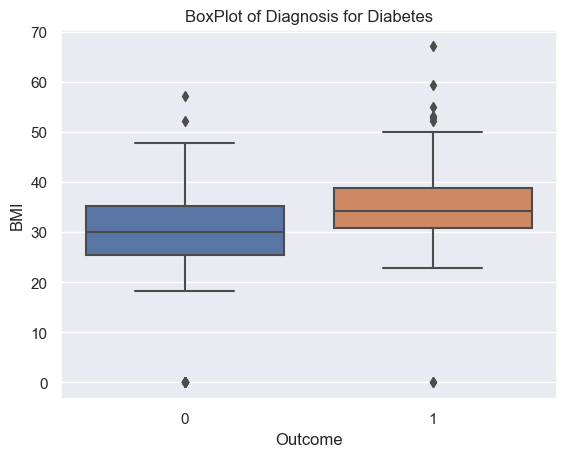

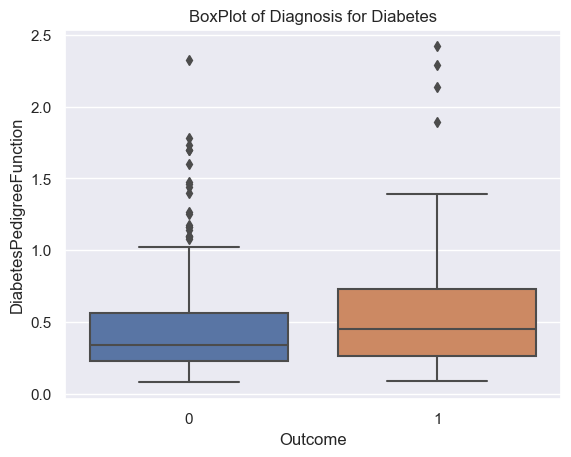

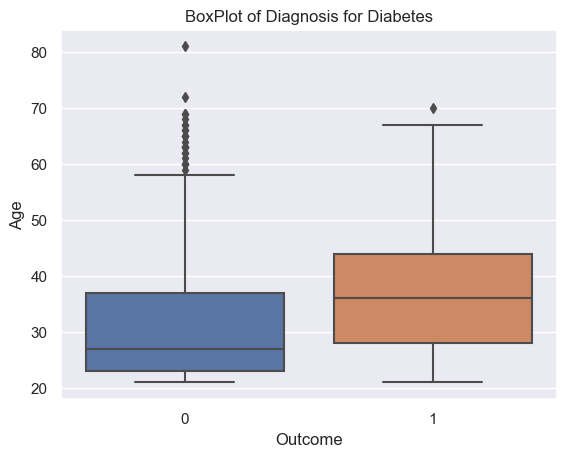

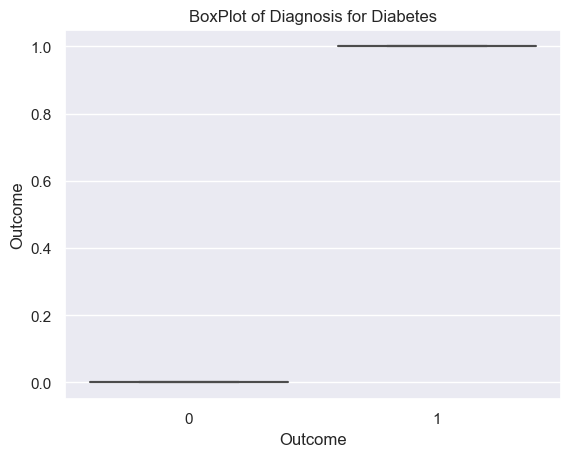

In [96]:
#Relationship of variables
for columns in diabetes_data:
    sb.boxplot(x='Outcome', y=columns, data=diabetes_data)
    plt.title(f'BoxPlot of Diagnosis for Diabetes')
    plt.ylabel(f'{columns}')
    plt.show()

Text(0.5, 1.0, 'Insulin Vs Glucose')

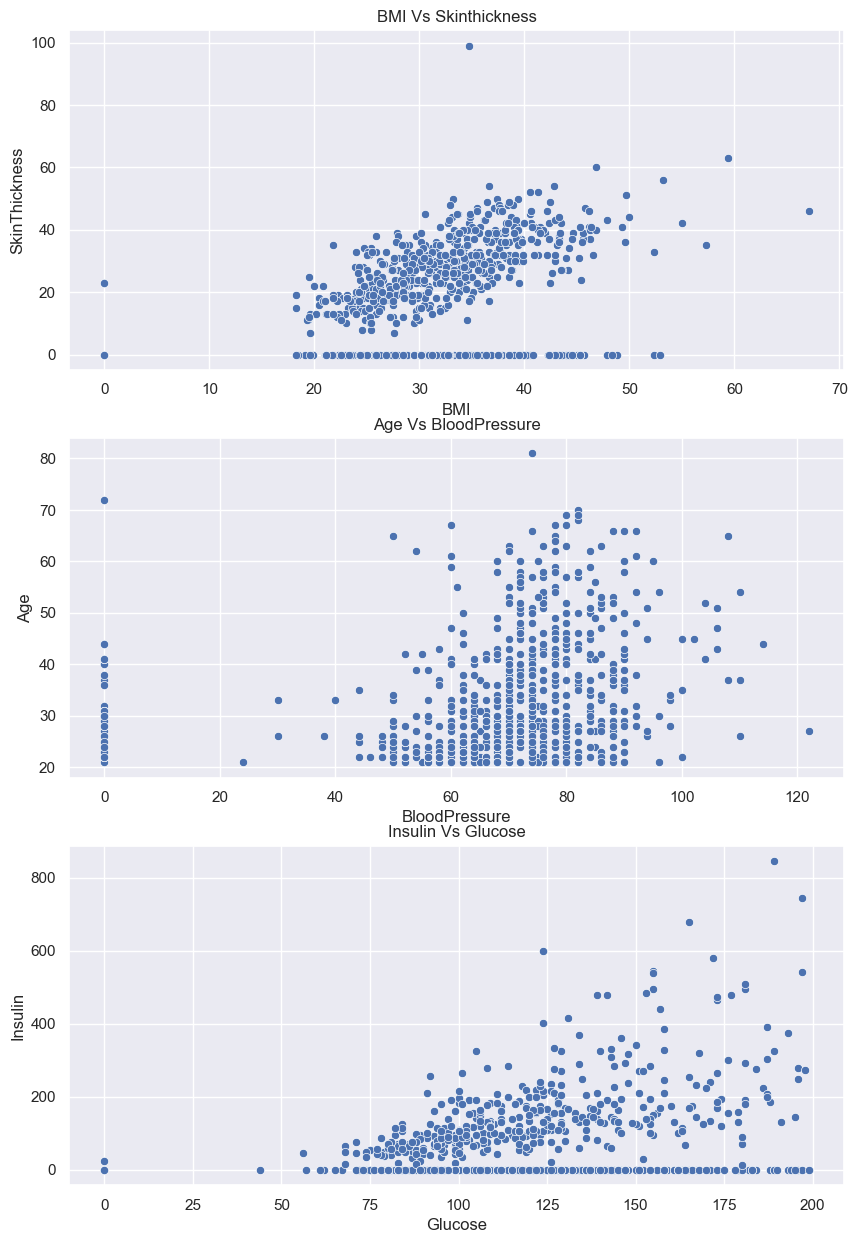

In [114]:
# Lets evaluate some more insights the data relationships
f, axes = plt.subplots(3, 1, figsize=(10, 15))
sb.scatterplot(data=diabetes_data,x="BMI",y="SkinThickness",ax = axes[0])
axes[0].set_title('BMI Vs Skinthickness')
sb.scatterplot(data=diabetes_data,x="BloodPressure",y="Age",ax = axes[1])
axes[1].set_title('Age Vs BloodPressure')
sb.scatterplot(data=diabetes_data,x="Glucose",y="Insulin",ax = axes[2])
axes[2].set_title('Insulin Vs Glucose')

In [115]:
#Clean Data

In [122]:
#Removing the outliers from 'Insulin','BMI','DiabetesPedigreeFunction'

In [134]:
def Total_Outlier(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lowoutlier=Q1-1.5*IQR
    highoutlier=Q3+1.5*IQR
    totaloutlier=((data[column]<lowoutlier)|(data[column]>highoutlier)).sum()
    print("Total number of Outliers in "+ column + " are : {}".format(totaloutlier))
    
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']

for i in outliers_list:
    Total_Outlier(diabetes_data,i)

Total number of Outliers in Insulin are : 34
Total number of Outliers in BMI are : 19
Total number of Outliers in DiabetesPedigreeFunction are : 29


In [139]:
def Outlier_Removal(data,column):
    clean_data = data[(data[column]<highoutlier)&(data[column]>lowoutlier)]
    totaloutlier = ((clean_data[column] < lowoutlier) | (clean_data[column] > highoutlier)).sum()
    print("Total number of Outliers in "+ column + " are : {}".format(totaloutlier))
    return clean_data

outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']

for i in outliers_list:
    clean_data = Outlier_Removal(diabetes_data,i)

Total number of Outliers in Insulin are : 0
Total number of Outliers in BMI are : 0
Total number of Outliers in DiabetesPedigreeFunction are : 0


In [140]:
clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [149]:
#Graph for cleaned data

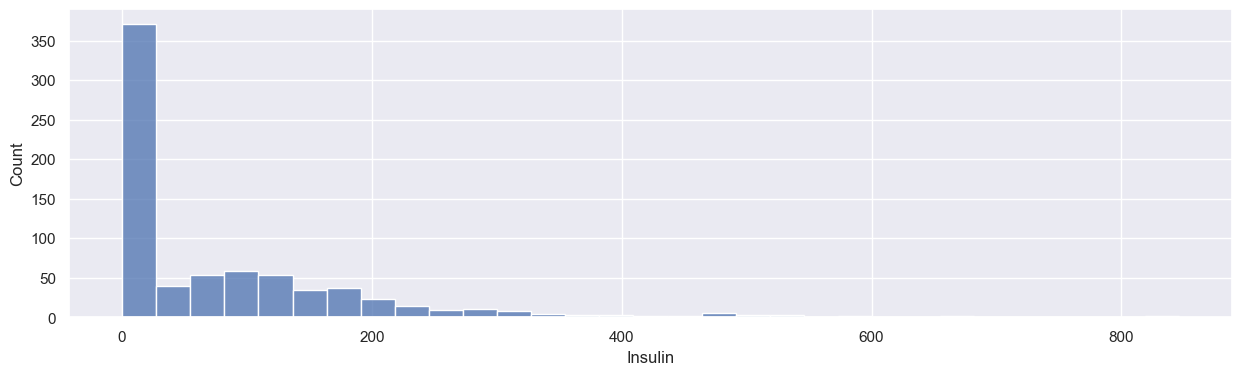

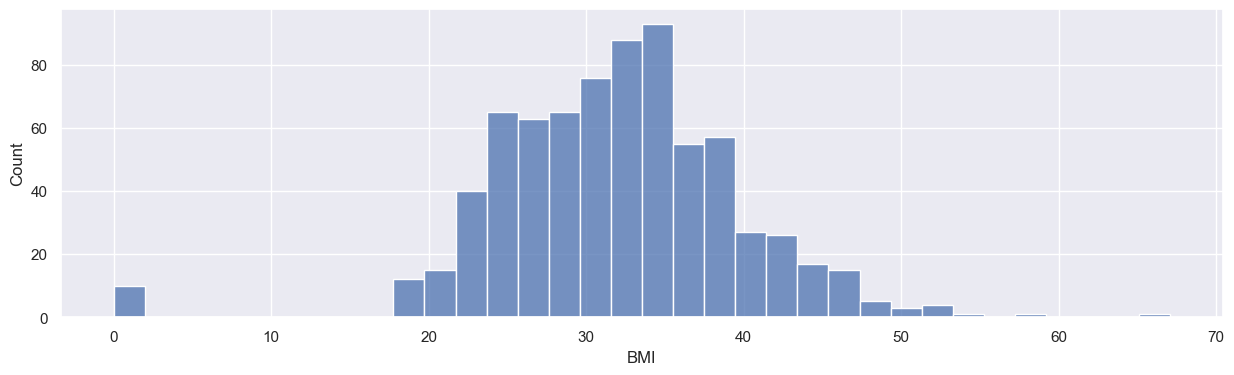

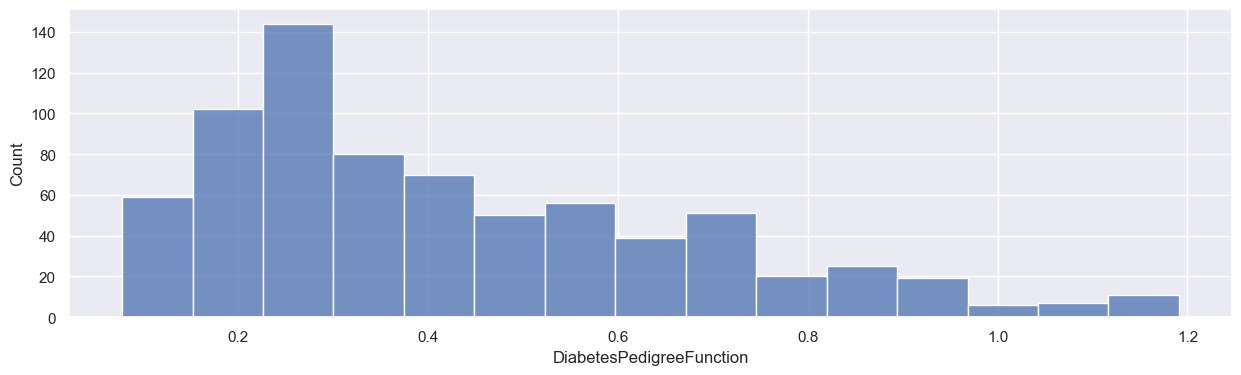

In [150]:
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']
def Univariate_boxplot (data,column):
    plt.figure(figsize=(15, 4))
    sb.histplot(data = data,x = column)

for columns in outliers_list :
    Univariate_boxplot (clean_data,columns)
    plt.show()

In [151]:
#Classification Tree
#We will be using 'Glucose','BMI' and 'Age' to help predict whether a patient had diabetes

Text(0.5, 1.0, 'Outcome by Glucose')

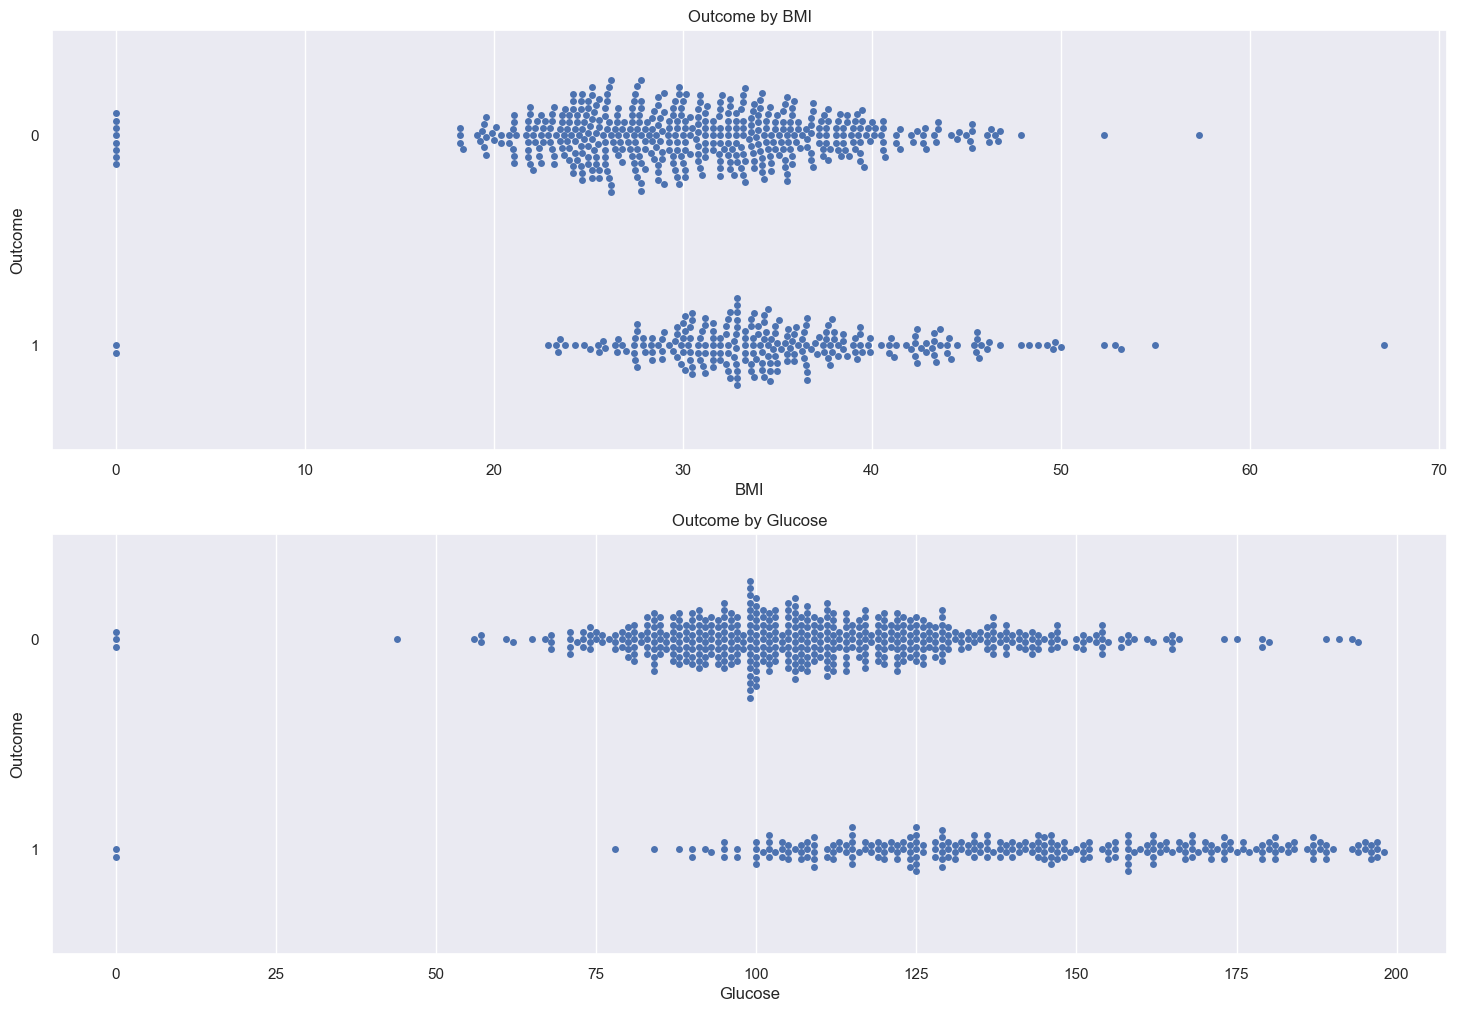

In [163]:
f, axes = plt.subplots(2, 1, figsize=(18, 12))

sb.swarmplot(x='BMI', y='Outcome', data=clean_data, orient="h", ax=axes[0])
axes[0].set_title('Outcome by BMI')

sb.swarmplot(x='Glucose', y='Outcome', data=clean_data, orient="h", ax=axes[1])
axes[1].set_title('Outcome by Glucose')

Text(0.5, 1.0, 'Outcome by Glucose')

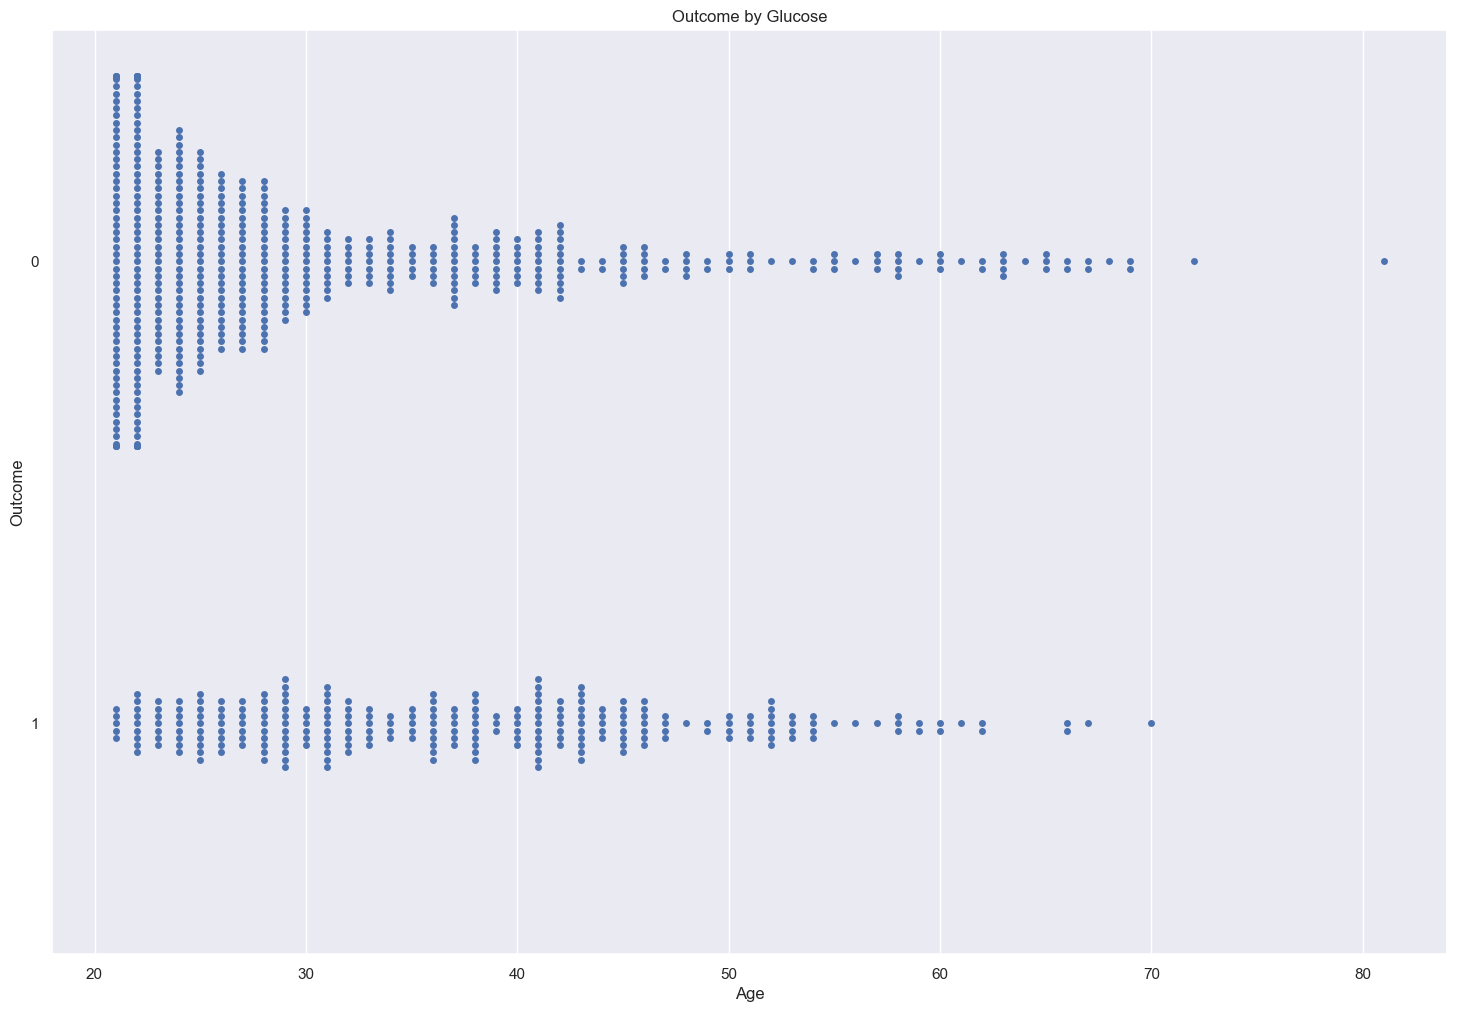

In [162]:
f, axes = plt.subplots(1, 1, figsize=(18, 12))

sb.swarmplot(x='Age', y='Outcome', data=clean_data, orient="h", ax=axes)
axes.set_title('Outcome by Glucose')

In [169]:
#Glucose